Santander Bank asked the Kaggler data science community to help them identify dissatisfied customers early in their relationship.

The dataset provided had 76020 rows and 371 anonymized columns of customer data.Using these anonymized features the challenge is to build a model that could predict predict if a customer is satisfied or dissatisfied with their banking experience.


### Get imports for data access, wrangling and visualization

In [1]:
import pandas as pd
import numpy as np

#data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#see plots in jupyter notebook
%matplotlib inline

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Load training data

In [2]:
#import training and testing datasets
path = "E:/DATA SCIENCE/DS680 - Marketing Analytics and Operations Research/santander_customer_satisfaction"

train = pd.read_csv(path + "/train.csv")
#train.head()

### Explore dataset

In [181]:
#set this option to get full print out of tables in pandas
pd.set_option('display.max_columns', None)

In [3]:
train.shape

(76020, 371)

In [4]:
#describe dataset 
describe = train.describe()

#- resulting description table with 370 columns was too long and so the cell had to be cleared for 
#clarity.

### Perform feature selection to get most important features for further analysis. 

Many of the 370 columns have 0s. 

First transpose the 'describe' dataset 

In [5]:
#tranpose describe table and drop ID column 
t_described = describe.transpose()
t_described = t_described.drop('ID', axis=0)

#rename the index col to 'variables'
t_described.index.names=['feature']
t_described.reset_index(inplace=True)
t_described.head()

,feature,count,mean,std,min,25%,50%,75%,max
0,var3,76020.0,-1523.199277,39033.462364,-999999.0,2.0,2.0,2.0,238.00
1,var15,76020.0,33.212865,12.956486,5.0,23.0,28.0,40.0,105.00
2,imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.0,0.0,0.0,0.0,210000.00
3,imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.0,0.0,0.0,0.0,12888.03
4,imp_op_var39_comer_ult3,76020.0,119.529632,546.266294,0.0,0.0,0.0,0.0,21024.81


In [6]:
#check new shape
t_described.shape

(370, 9)

#### Make barplot to visualize the statisics for each column

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\matplotlib\artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\matplotlib\scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


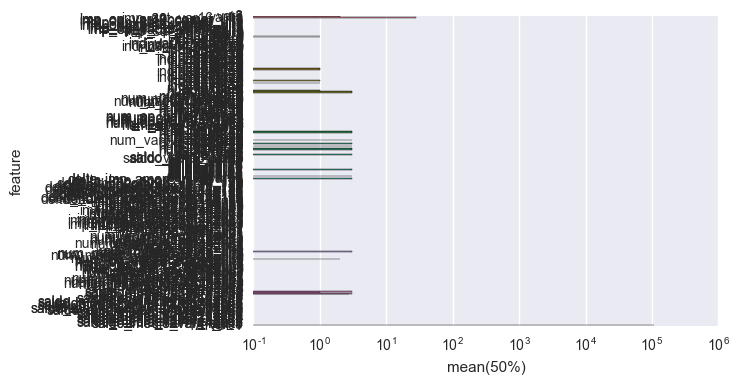

In [7]:
g = sns.barplot(y='feature',x='50%',data=t_described,orient='h',)
g.get_axes().set_xscale('log')
plt.show()

In [8]:
# above chart shows that very few of the variables have non zeros at the 75th percentile. Sort tables in decreasing order

t_described.sort(columns='75%',ascending = False).head()

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,feature,count,mean,std,min,25%,50%,75%,max
368,var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76
182,saldo_var30,76020.0,13679.673658,63014.078142,-4942.26,0.0000,3.00,235.9950,3458077.32
190,saldo_var42,76020.0,7191.725395,49145.313879,-4942.26,0.0000,3.00,120.0000,3008077.32
193,var36,76020.0,40.449079,47.362719,0.00,2.0000,3.00,99.0000,99.00
164,saldo_var5,76020.0,1028.468235,9852.140073,-2895.72,0.0000,3.00,90.0000,619329.15


##### Chart shows that only few features have a 75% percentile value not equal to zero. 

##### Now we extract all features which have a 50th percentile not equal to zero and save to a dataframe

In [9]:
cols = t_described.loc[t_described['50%']!=0]
print (cols.head())
print (cols.shape)

        feature    count         mean           std       min   25%   50%  \
0          var3  76020.0 -1523.199277  39033.462364 -999999.0   2.0   2.0   
1         var15  76020.0    33.212865     12.956486       5.0  23.0  28.0   
23   ind_var5_0  76020.0     0.958024      0.200535       0.0   1.0   1.0   
24     ind_var5  76020.0     0.663760      0.472425       0.0   0.0   1.0   
62  ind_var30_0  76020.0     0.995488      0.067020       0.0   1.0   1.0   

     75%    max  
0    2.0  238.0  
1   40.0  105.0  
23   1.0    1.0  
24   1.0    1.0  
62   1.0    1.0  
(29, 9)


In [10]:
#Extract the columns from the original dataset which have columns with 50th percentile not equal to zero.
new_data = cols['feature']

#get a list of these columns
list_cols = list(new_data)

#apply list to original training dataset to get new dataset with features non zero 50th percentile values
df = train[list_cols]
df.shape

(76020, 29)

In [11]:
#extract TARGET from original dataframe 
data_target = pd.DataFrame(train['TARGET'],)
data_target.head()

,TARGET
0,0
1,0
2,0
3,0
4,0


In [13]:
#merge data_target and df
frames = [df, data_target]
df_train = pd.concat(frames,axis=1)
#df_train.head()

##### now check description of re-engineered dataframe

In [12]:
#df_train.describe()

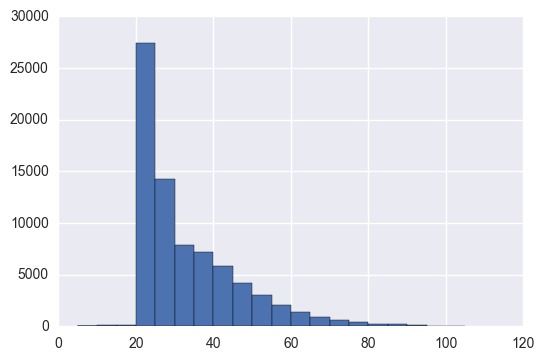

In [14]:
#check some distributions
df_train.var15.hist(bins=20)

check distribution of var3. -9999999 seems irregular. Remove outlier if necessary

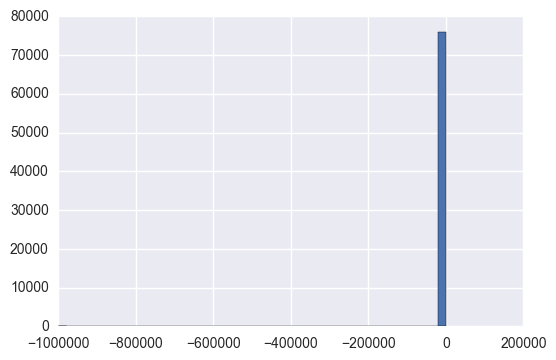

In [15]:
df_train.var3.hist(bins=50)

In [16]:
#-9999999 in var3 column seems to be an outlier. Replace with most common value of 2
train = df_train.replace(-999999,2)

#check if -999999 is still present
train.loc[train.var3 == -999999].shape

(0, 30)

get count of categories in TARGET column

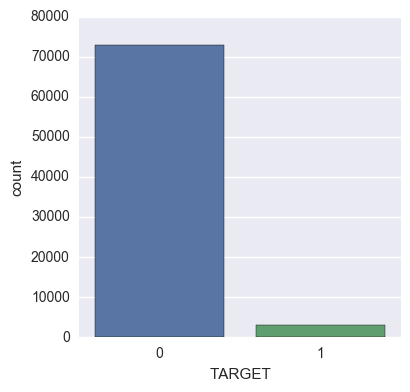

In [17]:
sns.factorplot('TARGET', data= train, kind='count')

In [18]:
train[train < 0]=0
print (train.shape)

(76020, 30)


In [19]:
test = pd.read_csv(path + "/test.csv")
#test.head()

In [23]:
#drop id and target columns from training data
X = train.drop(['TARGET'],axis = 1)
y = train['TARGET']

### Use PCA together with logistic regression. Use pipeline to assemble several steps that can be cross-validated together while setting different parameters

In [20]:
#set up PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA()

In [21]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn import linear_model
import sklearn

logistic = linear_model.LogisticRegression()


#### split training data into traning and testing set, set up pipeline and fit it on split training data.

In [24]:
steps = [('pca', pca), ('logistic', logistic)]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=42, test_size=0.25, 
                                                                            stratify = y)
#fit pipeline on X_train and y_train
log_clf = pipeline.fit(X_train, y_train)
log_clf

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

#### Use PCA and logistic regression pipeline on test data to make predictions

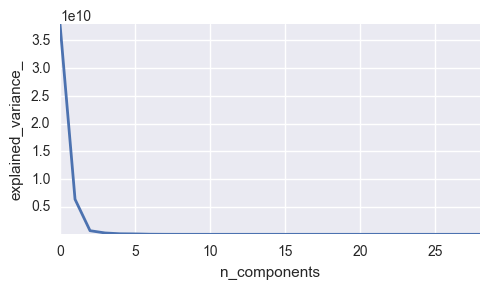

In [25]:
pca.fit(X_train)

plt.figure(1, figsize=(6,3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [26]:
#make prediction
y_prediction = pipeline.predict(X_test)

#get accuracy report
accuracy_report = sklearn.metrics.accuracy_score(y_test,y_prediction)
print ("Model Accuracy: ",accuracy_report)

#get classification report
report = sklearn.metrics.classification_report(y_test, y_prediction)
print ("\nClassification Report: \n", report)

#get confusion matrix
conf_matrix = sklearn.metrics.confusion_matrix(y_test,y_prediction)
print ("Confusion Matrix: \n", conf_matrix)

Model Accuracy:  0.900394632991

Classification Report: 
              precision    recall  f1-score   support

          0       0.96      0.93      0.95     18253
          1       0.08      0.15      0.11       752

avg / total       0.93      0.90      0.91     19005

Confusion Matrix: 
 [[16998  1255]
 [  638   114]]


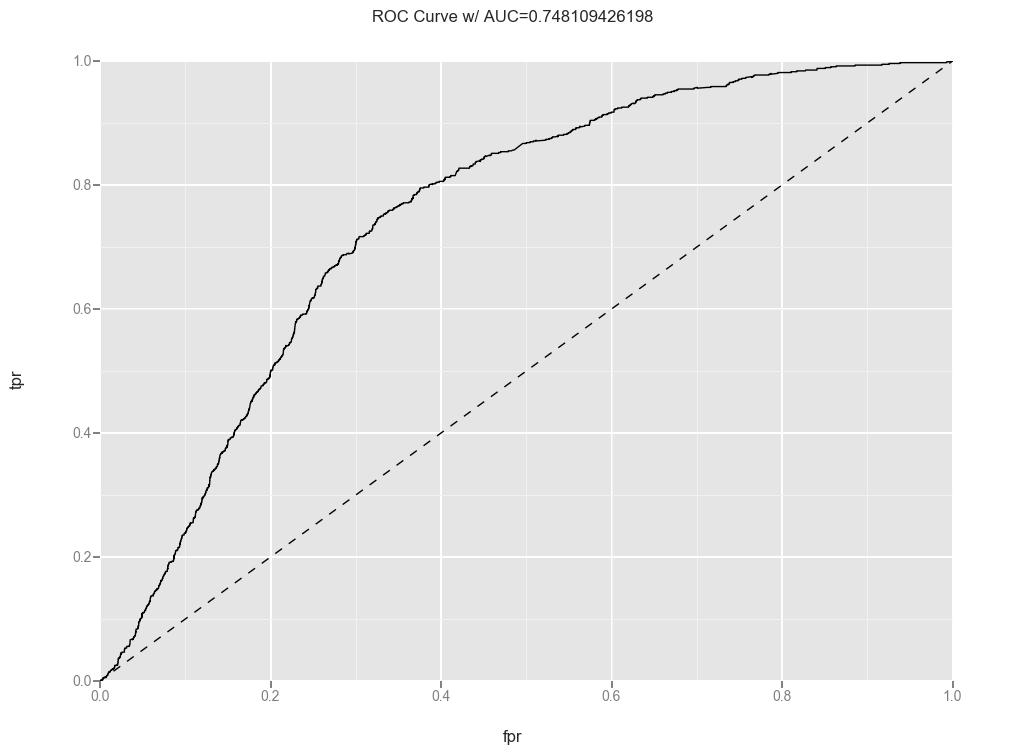

<ggplot: (137157308245)>

In [27]:
#get AUC and ROC curve
preds = log_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,preds)

#calculate the AUC
auc = sklearn.metrics.auc(fpr,tpr)

from ggplot import *
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed') +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))


#### make a prediction based solely on training data just to crosscheck with result obtained

In [28]:
train_prediction = pipeline.predict(X_train)

#get accuracy report
train_accuracy_report = sklearn.metrics.accuracy_score(y_train,train_prediction)
print ("Model Accuracy: ",train_accuracy_report)

#get classification report
train_report = sklearn.metrics.classification_report(y_train, train_prediction)
print ("\nClassification Report: \n", train_report)

#get confusion matrix
train_conf_matrix = sklearn.metrics.confusion_matrix(y_train,train_prediction)
print ("Confusion Matrix: \n", train_conf_matrix)

Model Accuracy:  0.903762167851

Classification Report: 
              precision    recall  f1-score   support

          0       0.96      0.93      0.95     54759
          1       0.10      0.17      0.12      2256

avg / total       0.93      0.90      0.92     57015

Confusion Matrix: 
 [[51146  3613]
 [ 1874   382]]


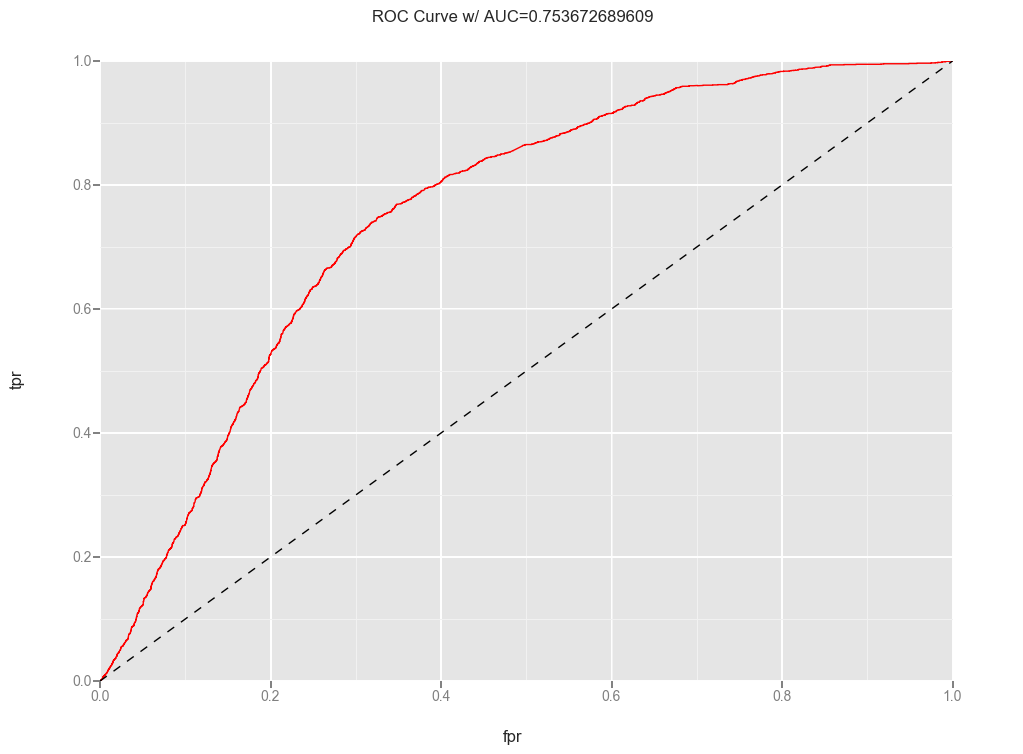

<ggplot: (-9223371899697456110)>

In [29]:
#get AUC and ROC curve
train_preds = log_clf.predict_proba(X_train)[:,1]
fpr1, tpr1, _ = sklearn.metrics.roc_curve(y_train,train_preds)

#calculate the AUC
auc = sklearn.metrics.auc(fpr1,tpr1)

from ggplot import *
df = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line(color='red') +\
    geom_abline(linetype='dashed') +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

###  Use random forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= 17, random_state=1)

scores = model_selection.cross_val_score(rf_clf, X_train, y_train, scoring='roc_auc', cv=5) 
print(scores.mean())

#now fit data to tree
rf_clf.fit(X_train, y_train)

In [210]:
#make prediction
rf_pred = rf_clf.predict(X_test)


#### get model evaluation reports

In [211]:
rf_clf_accuracy_report = sklearn.metrics.accuracy_score(y_test,rf_pred)
print ("Model Accuracy: ",rf_clf_accuracy_report)

#get classification report
rf_clf_report = sklearn.metrics.classification_report(y_test, rf_pred)
print ("\nClassification Report: \n", rf_clf_report)

#get confusion matrix
rf_conf_matrix = sklearn.metrics.confusion_matrix(y_test,rf_pred)
print ("Confusion Matrix: \n", rf_conf_matrix)

Model Accuracy:  0.959800052618

Classification Report: 
              precision    recall  f1-score   support

          0       0.96      1.00      0.98     18253
          1       0.07      0.00      0.00       752

avg / total       0.93      0.96      0.94     19005

Confusion Matrix: 
 [[18240    13]
 [  751     1]]


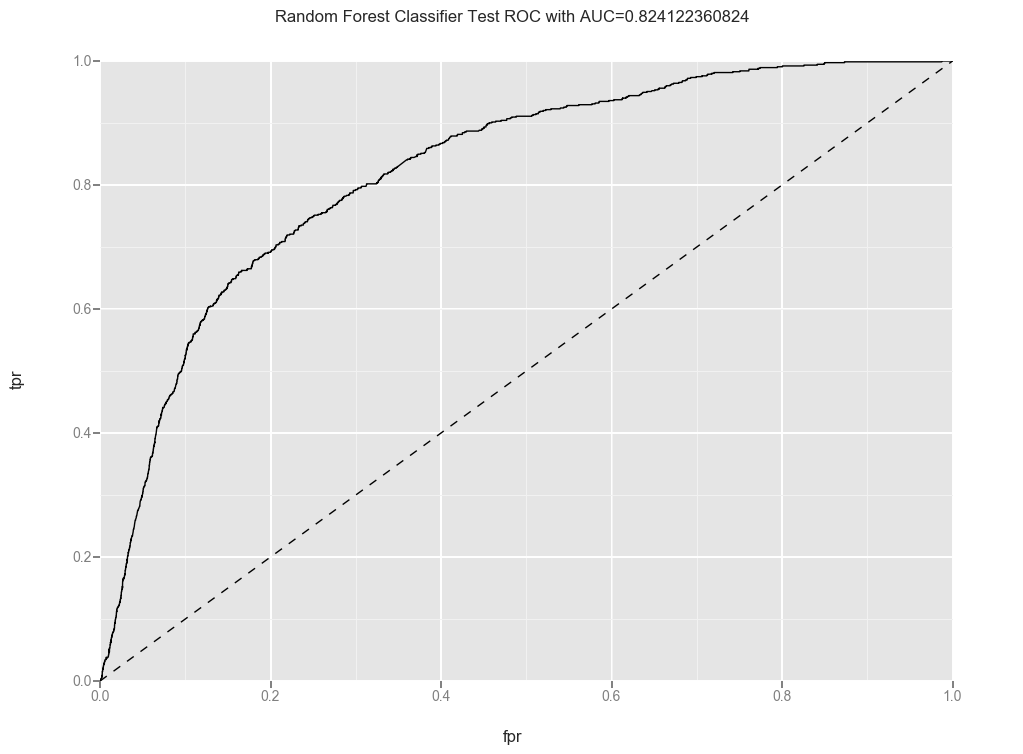

<ggplot: (-9223371912822813608)>

In [212]:
preds = rf_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,preds)

#calculate the AUC
auc = sklearn.metrics.auc(fpr,tpr)

from ggplot import *
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed') +\
    ggtitle("Random Forest Classifier Test ROC with AUC=%s" % str(auc))

### Use Gradient Boosting Classifier

In [213]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

clf.score(X_train, y_train) 

0.96053670086819254

In [214]:
#make predictions
y_pred = clf.predict(X_test)

#### Get Gradient boosting classifier model evaluation reports

In [215]:
clf_accuracy_report = sklearn.metrics.accuracy_score(y_test,y_pred)
print ("Model Accuracy: ",clf_accuracy_report)

#get classification report
clf_report = sklearn.metrics.classification_report(y_test, y_pred)
print ("\nClassification Report: \n", clf_report)

#get confusion matrix
clf_conf_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred)
print ("Confusion Matrix: \n", clf_conf_matrix)

Model Accuracy:  0.960431465404

Classification Report: 
              precision    recall  f1-score   support

          0       0.96      1.00      0.98     18253
          1       0.50      0.00      0.00       752

avg / total       0.94      0.96      0.94     19005

Confusion Matrix: 
 [[18252     1]
 [  751     1]]


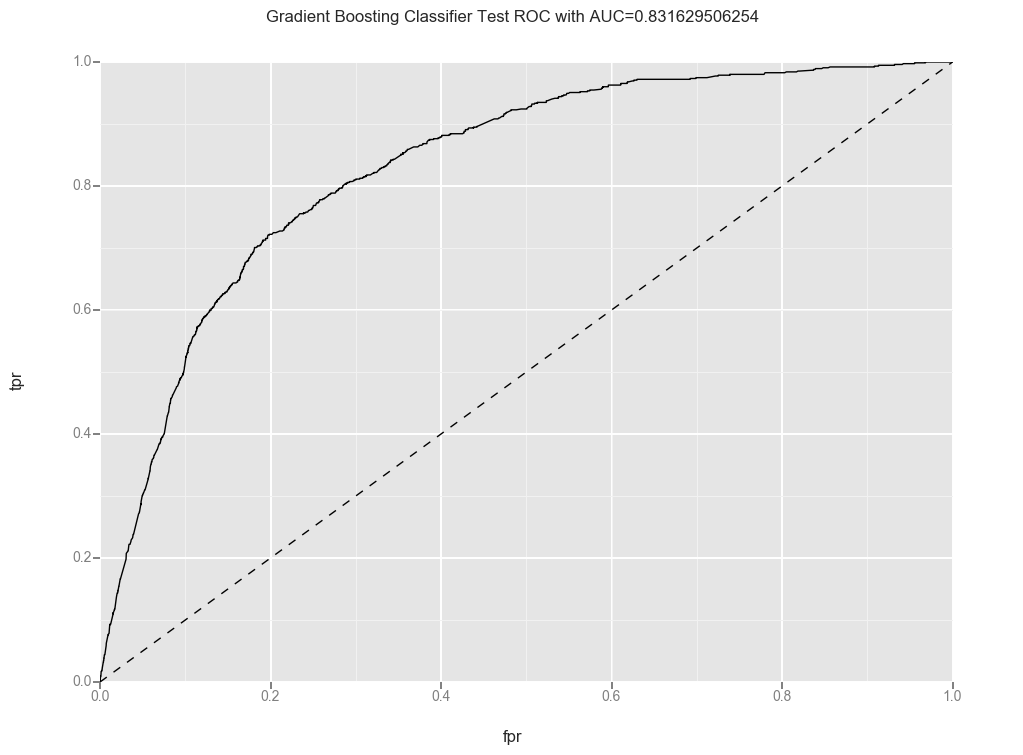

<ggplot: (124033026617)>

In [216]:
#plot roc curve for predictions
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,preds)

#calculate the AUC
auc = sklearn.metrics.auc(fpr,tpr)

from ggplot import *
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed') +\
    ggtitle("Gradient Boosting Classifier Test ROC with AUC=%s" % str(auc))


In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

xgb_clf = xgb.XGBClassifier(max_depth = 5,
                n_estimators=1000,
                learning_rate=0.1, 
                nthread=4,
                subsample=1.0,
                colsample_bytree=0.5,
                min_child_weight = 3,
                scale_pos_weight = 1,
                reg_alpha=0.03,
                seed=1301)
modelfit(xgb_clf,X_train, y_test)

#xgb_clf.fit(X_train, y_train, eval_metric = "auc",early_stopping_rounds = 50, 
 #           eval_set =[(X_train, y_train), (X_test, y_test)])

#xgb_clf.score(X_train, y_train) 



In [218]:
y_pred = xgb_clf.predict(X_test)

xgb_clf_accuracy_report = sklearn.metrics.accuracy_score(y_test,y_pred)
print ("Model Accuracy: ",xgb_clf_accuracy_report)

#get classification report
xgb_clf_report = sklearn.metrics.classification_report(y_test, y_pred)
print ("\nClassification Report: \n", xgb_clf_report)

#get confusion matrix
xgb_clf_conf_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred)
print ("Confusion Matrix: \n", xgb_clf_conf_matrix)

Model Accuracy:  0.960431465404

Classification Report: 
              precision    recall  f1-score   support

          0       0.96      1.00      0.98     18253
          1       0.50      0.00      0.01       752

avg / total       0.94      0.96      0.94     19005

Confusion Matrix: 
 [[18251     2]
 [  750     2]]


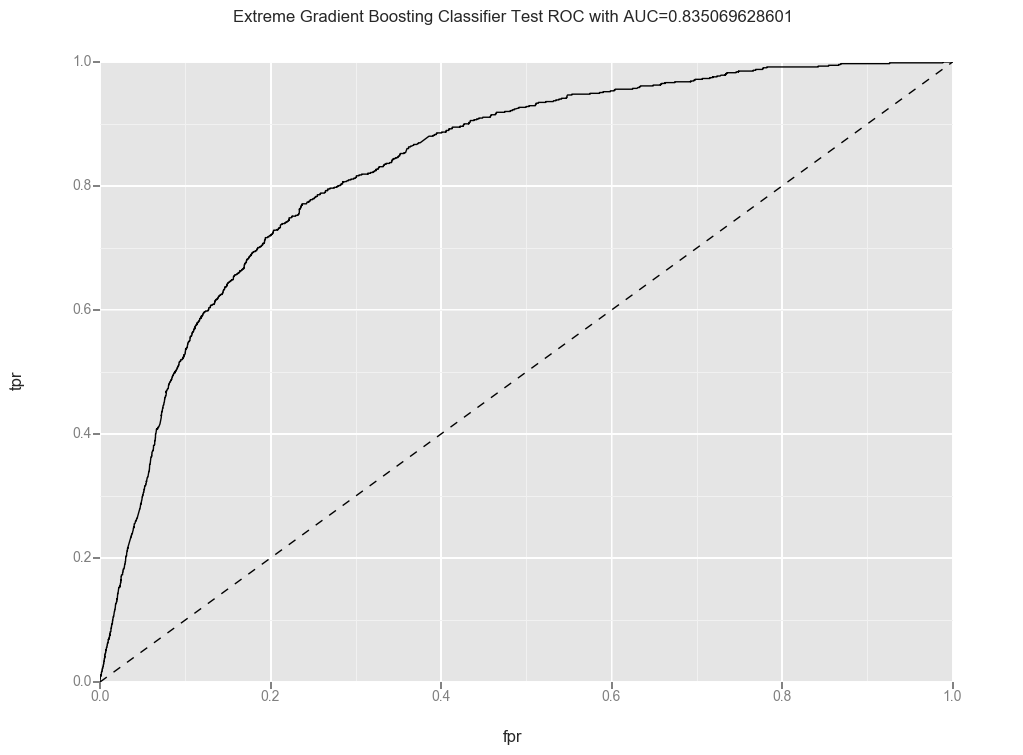

<ggplot: (124031916587)>

In [219]:
#plot roc curve for predictions
preds = xgb_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,preds)

#calculate the AUC
auc = sklearn.metrics.auc(fpr,tpr)

from ggplot import *
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed') +\
    ggtitle("Extreme Gradient Boosting Classifier Test ROC with AUC=%s" % str(auc))


#### From the 3 models run, the Gradient Boosting Classifier has the best performance with the following:
##### test AUC -- 0.8316, 
##### f1 score  --  0.94
##### model accuracy -- 0.96.
#### Now proceed to use this model for the prediction using the actual test data provided.

In [220]:
# make target predictions using provided test data

#import test data
test = pd.read_csv(path + "/test.csv")

#extract column with ID
id_test = test['ID']

#apply list_cols to test dataset to select needed columns of test data
df_test = test[list_cols]

#make predictions using gradient boosting classifier
predictions = clf.predict(df_test)

In [221]:
#check datatype of 'predictions'
type(predictions)

numpy.ndarray

In [222]:
#concat predictions with id_test.
#First convert predictions from numpy ndarray to dataframe

predictions_df = pd.DataFrame(data=predictions,index=None, columns=["TARGET"])
predictions_df.head()

,TARGET
0,0
1,0
2,0
3,0
4,0


In [223]:
submission = pd.concat([id_test,predictions_df],axis=1)

In [224]:
submission.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [225]:
submission.tail()

,ID,TARGET
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0
75817,151837,0


In [226]:
#save submissionfile to pdf
submission.to_csv('prediction_file.csv',columns=["ID","TARGET"],index=False)

In [227]:
#check how many 0s and 1s were predicted
submission.groupby("TARGET").count()

,ID
TARGET,
0,75807
1,11


In [228]:
#for submission to kaggle. Since this competition uses AUC as the evaluation metric, they need probabilities rather 
#than 0/1 outcome. They need probabilities to calculate sensitivity and specificity at multiple thresholds.

predictions1 = clf.predict_proba(df_test)

In [229]:
predictions1[:,1]

array([ 0.07100803,  0.05244938,  0.00358068, ...,  0.00239382,
        0.05560759,  0.00160239])

In [230]:
predictions1_df = pd.DataFrame(data=predictions1[:,1],index=None, columns=["TARGET"])
predictions1_df.head()

,TARGET
0,0.071008
1,0.052449
2,0.003581
3,0.015231
4,0.004265


In [231]:
submission1 = pd.concat([id_test,predictions1_df],axis=1)

In [232]:
#convert to csv

submission1.to_csv('prediction_file_1.csv',index=False)

In [233]:
submission1

,ID,TARGET
0,2,0.071008
1,5,0.052449
2,6,0.003581
3,7,0.015231
4,9,0.004265
5,11,0.234942
6,12,0.003183
7,15,0.158531
8,16,0.033076
9,17,0.047309
